# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [2]:
dataset = pd.read_csv("Amazon_Sale_Report.csv")
dataset.head()

C:\Users\Draizel\AppData\Local\Temp\ipykernel_9000\2152421650.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("Amazon_Sale_Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
dataset.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [4]:
dataset.shape

(128975, 24)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [6]:
dataset.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


# Pemilihan Atribut X Dan Preprocessing

In [7]:
dataset = dataset[["Qty", "Amount"]] #Qty=x1, Amount=x2
dataset.head(10)

,Qty,Amount
0,0,647.62
1,1,406.00
2,1,329.00
3,0,753.33
4,1,574.00
5,1,824.00
6,1,653.00
7,1,399.00
8,0,NaN
9,1,363.00


In [8]:
dataset.describe()

,Qty,Amount
count,128975.000000,121180.000000
mean,0.904431,648.561465
std,0.313354,281.211687
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


# Membuang data NaN

In [9]:
dataset = dataset.dropna()

In [10]:
dataset.head(10)

,Qty,Amount
0,0,647.62
1,1,406.00
2,1,329.00
3,0,753.33
4,1,574.00
5,1,824.00
6,1,653.00
7,1,399.00
9,1,363.00
10,1,685.00


In [11]:
dataset.describe()

,Qty,Amount
count,121180.000000,121180.000000
mean,0.961231,648.561465
std,0.214354,281.211687
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,8.000000,5584.000000


# Statistik Data

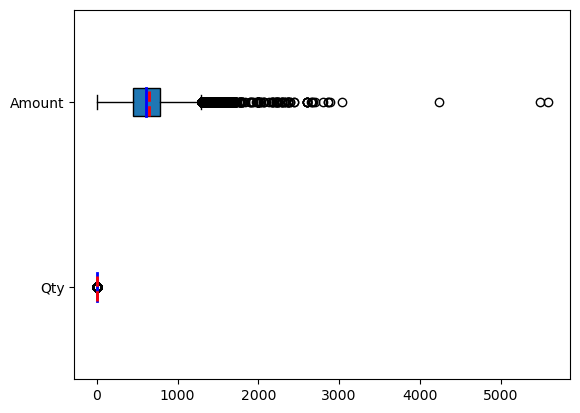

In [12]:
plt.boxplot(dataset.values, vert=False, showmeans=True, meanline=True,
            labels=["Qty", "Amount"], patch_artist=True,
            medianprops={"linewidth": 2, "color": "blue"},
            meanprops={"linewidth": 2, "color": "red"})
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

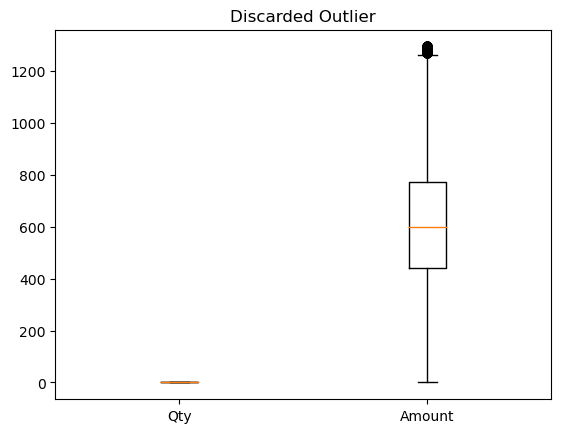

In [13]:
#Q1,Q3, IQR
kolom = ["Qty", "Amount"]

Q1 = dataset[kolom].quantile(0.25)
Q3 = dataset[kolom].quantile(0.75)
IQR = Q3-Q1
data = dataset[~((dataset[kolom]<(Q1 - 1.5 * IQR)) | 
                (dataset[kolom]>(Q3 + 1.5 * IQR))).any(axis = 1)]
plt.boxplot(data[kolom])
plt.xticks([1,2], kolom)
plt.title("Discarded Outlier")
plt.show

In [14]:
dataset.describe()

,Qty,Amount
count,121180.000000,121180.000000
mean,0.961231,648.561465
std,0.214354,281.211687
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,8.000000,5584.000000


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121180 entries, 0 to 128974
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Qty     121180 non-null  int64  
 1   Amount  121180 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.8 MB


# Membuat Nilai dari X

In [16]:
x_array = np.array(dataset)

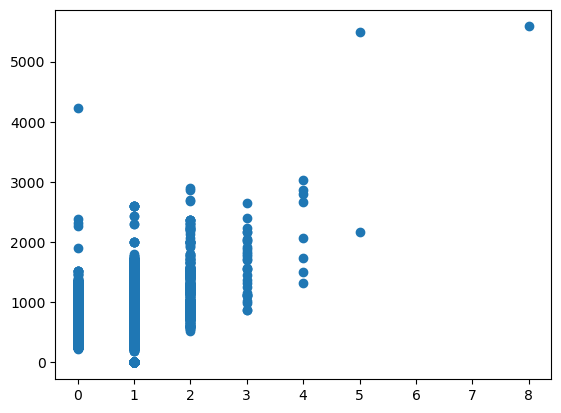

In [17]:
plt.scatter(dataset.Qty, dataset.Amount)

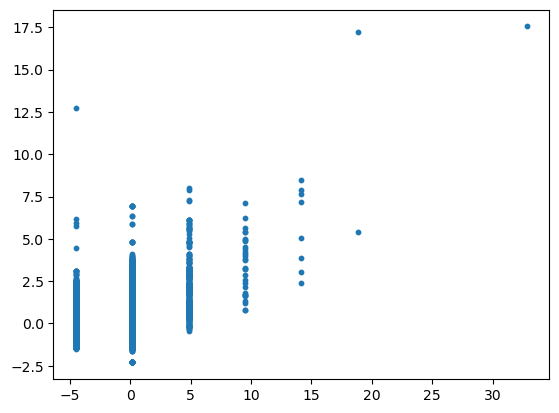

In [18]:
from sklearn.preprocessing import StandardScaler as stdsc
scaler = stdsc()
x_scaled = scaler.fit_transform(x_array)
plt.scatter(x_scaled[:,0], x_scaled[:,1],s=10)
plt.show()

# Check Sum Square Error

In [19]:
from sklearn.cluster import KMeans
sse = []
index = range(1,10)
for i in index :
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init=10) # (n_init= bisa 'auto' atau 10)
    kmeans.fit(x_scaled)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print (i,sse_)

1 242359.99999999403
2 134456.22608927253
3 61823.44081153443
4 38256.42306854131
5 27524.152166853637
6 21459.66556977742
7 17344.26449893671
8 13968.339153777973
9 11534.132208188435


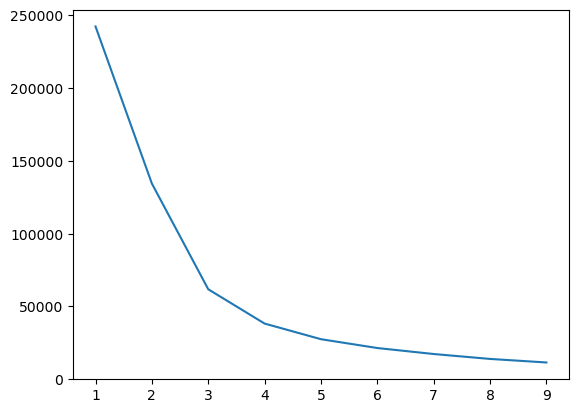

In [20]:
plt.plot(index,sse)
plt.show()

# Mencari 2 Cluster Pusat

In [21]:
data = {'Qty': [128975.000000, 64487.000000, 37232.019822, 0.000000, 32243.500000, 64487.000000, 96730.500000, 128974.000000],
            'Amount': [128975.000000, 0.904431, 648.561465, 463966.236509, 1.000000, 1.000000, 1.000000, 15.000000]}

In [22]:
df = pd.DataFrame(data)

In [23]:
df['Qty'].fillna(0, inplace=True)

In [24]:
X = df[['Qty']]

In [25]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [26]:
centers = kmeans.cluster_centers_
print("Pusat Cluster (k1 dan k2):")
print(centers)

Pusat Cluster (k1 dan k2):
[[118226.5      ]
 [ 39689.9039644]]


# Pembuatan Model dan Visualisasi Data Setelah Cluster

In [27]:
kmeans = KMeans(n_clusters = 3, random_state=0, n_init=10) # (n_init= bisa 'auto' atau 10)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [28]:
kmeans.cluster_centers_

array([[ 0.22564892,  1.02702002],
       [-4.48434507, -0.10001727],
       [ 0.18214953, -0.60737589]])

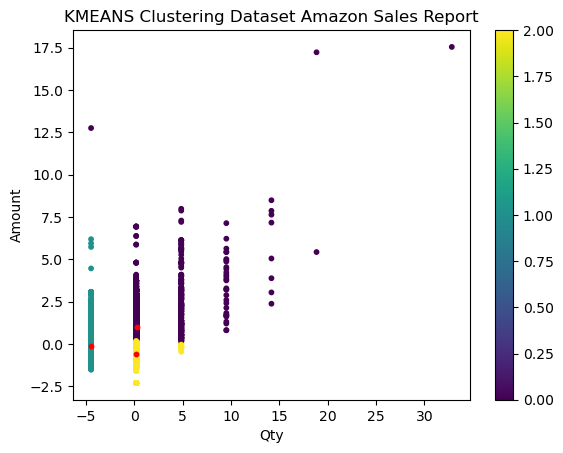

In [29]:
output = plt.scatter(x_scaled[:,0],x_scaled[:,1],s=10, c=kmeans.labels_) #Datanya

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c="red", s=10)#Centroid
plt.title("KMEANS Clustering Dataset Amazon Sales Report")
plt.xlabel("Qty")
plt.ylabel("Amount")
plt.colorbar(output)
plt.show()

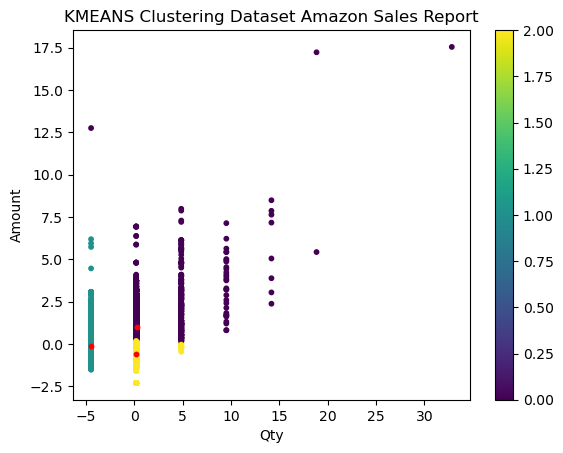

In [30]:
output = plt.scatter(x_scaled[:, 0], x_scaled[:, 1], s=10, c=kmeans.labels_)  # Datanya

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=10)  # Centroid
plt.title("KMEANS Clustering Dataset Amazon Sales Report")
plt.xlabel("Qty")
plt.ylabel("Amount")
plt.colorbar(output)
plt.show()


# Evaluasi Model

In [31]:
from sklearn.metrics import davies_bouldin_score

labels = kmeans.labels_
davies_bouldin_score(x_scaled, labels)

0.5217528875075618